## Hospital Beds - Data Cleaning & EDA

___
### Packages

In [148]:
import pandas as pd
from pathlib import Path
import missingno as msno
import matplotlib.pyplot as plt
import sys
import numpy as np

### Set Up Pathing

In [149]:
HOME = Path.cwd()
PROJECT_HOME = HOME.parent
sys.path.insert(1, str(PROJECT_HOME))

### Import ```.py``` Modules

In [150]:
import utils as ut

### Pamameters

In [151]:
DATA_FOLDER = PROJECT_HOME / "survey_data" / "CSV"
DATA_FILE = "response_data.csv"

column_missing_threshold = 1.00 # Used to find empty columns

### Load Data

In [152]:
df = pd.read_csv(str(DATA_FOLDER / DATA_FILE))

___
### Inspect & Modify Column Names

Problems:

1. The columns are currently organized hierarchically, i.e., the column names are combination of the current column names and the first row.
2. Additionally, the column names are NOT in a usable form.

Actions:
1. To correct these issues we will numerically encode the columns ($0$ to $161$) and generate guide to the column meanings.
2. We will also generate a mapping from the numerical encodings to usable and descriptive column names.
3. The dtype of the numerical encoding will string.


In [153]:
# Column mapping; can be used to change the column names with df.rename
column_mapping = {
                "0": "respondent_id",
                "1": "collector_id",
                "2": "start_date",
                "3": "end_date",
                "4": "ip_address", # I also deleted 5 - 8 when I dropped those columns
                "9": "respondent_name",
                "10": "respondent_title",
                "11": "respondent_email",
                "12": "respondent_phone_number",
                "13": "hospital_name",
                "hospital_address": "hospital_address", # this added when I parsed the hosptial column
                "14": "designated_critical_access_hospital",
                "15": "AD_skilled_nursing_facility_snf",
                "16": "AD_long_term_care_hospitcal_ltc",
                "17": "AD_residential_care_facility_rcf",
                "18": "AD_home_health_hh",
                "19": "AD_1to1_snf",
                "20": "AD_1to1_ltc",
                "21": "AD_1to1_rcf",
                "22": "AD_1to1_hh",
                "23": "AD_repatriating_snf",
                "24": "AD_repatriating_ltc",
                "25": "AD_repatriating_rcf",
                "26": "AD_repatriating_hh",
                "27": "AD_7_to_13_days_snf",
                "28": "AD_7_to_13_days_ltc",
                "29": "AD_7_to_13_days_rcf",
                "30": "AD_7_to_13_days_hh",
                "31": "AD_14_to_29_days_snf",
                "32": "AD_14_to_29_days_ltc",
                "33": "AD_14_to_29_days_rcf",
                "34": "AD_14_to_29_days_hh",
                "35": "AD_30d_to_6m_days_snf",
                "36": "AD_30d_to_6m_days_ltc",
                "37": "AD_30d_to_6m_days_rcf",
                "38": "AD_30d_to_6m_days_hh",
                "39": "AD_greater_6m_days_snf",
                "40": "AD_greater_6m_days_ltc",
                "41": "AD_greater_6m_days_rcf",
                "42": "AD_greater_6m_days_hh",
                "43": "AD_require_short_term_rehabilitation_beds_snf",
                "44": "AD_require_additional_PT_OT_before_discharge_to_snf/ltc/rcf/hh",
                "45": "AD_require_long_term_care_beds_snf",
                "46": "AD_snf_beds_with_geri_psych_capabilities",
                "47": "AD_require_snf_care_and_tracheostomy_and_percutaneous_endoscopic_gastrostomy",
                "48": "AD_require_snf_care_and_long_term_management_of_a_vent",
                "49": "AD_require_snf_with_bariatric_concerns_(>300lbs)",
                "50": "AD_with_dementia_diagnoses_who_require_snf_care_in_a_secure_facility",
                "51": "AD_inability_to_find_an_appropriate_facility_within_their_geographic_area",
                "52": "AD_alcohol_substance_abuse_snf",
                "53": "AD_alcohol_substance_abuse_ltc",
                "54": "AD_alcohol_substance_abuse_rcf",
                "55": "AD_alcohol_substance_abuse_hh",
                "56": "AD_alcohol_substance_abuse_soboxone_barrier_snf",
                "57": "AD_alcohol_substance_abuse_soboxone_barrier_ltc",
                "58": "AD_alcohol_substance_abuse_soboxone_barrier_rcf",
                "59": "AD_alcohol_substance_abuse_soboxone_barrier_hh",
                "60": "AD_confirmed_covid_19_positive",
                "61": "AD_covid_19_recovered"
}

In [154]:
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,Respondent Contact Information:,...,"Of those patients reported in question 11, how many are awaiting beds/placements in the following settings?",Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,What are the biggest factors affecting boarding patients in your emergency department? (Please describe),Unnamed: 159,Unnamed: 160
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Name:,...,Inpatient bed for medical management (Interhos...,Inpatient bed for medical management (Intrahos...,Detox/SUD/OUD Tx facility,Inpatient psychiatric,LTC/SNF,Behavioral Health Home/PNMI/IDD Facility,Other,Factor 1:,Factor 2:,Factor 3:
1,1.186852e+11,457316537.0,09/05/2024 07:26:18 AM,09/05/2024 08:12:47 AM,63.165.188.241,NaN,NaN,NaN,NaN,Sue Parent Dorson,...,NaN,NaN,NaN,1,2,NaN,NaN,psych beds,PNMI,LTC/Res Care beds
2,1.186851e+11,457316537.0,09/05/2024 04:29:01 AM,09/05/2024 04:29:38 AM,63.165.188.241,NaN,NaN,NaN,NaN,Janelynn Deprey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.186843e+11,457316537.0,09/04/2024 06:46:40 AM,09/04/2024 08:21:38 AM,63.165.188.241,NaN,NaN,NaN,NaN,Sue Parent Dorson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.186833e+11,457316537.0,09/03/2024 03:36:40 AM,09/03/2024 03:42:37 AM,192.219.255.13,NaN,NaN,NaN,NaN,NaN,...,0,5,0,1,1,0,0,Community Psychiatric Resources,"Community elderly care , SNF,LTC",Hospital bed capacity


In [155]:
# Sample of current column names
for idx, col in enumerate(df.columns):
    print(f"{idx}: {col}")
    if idx == 30:
        break

0: Respondent ID
1: Collector ID
2: Start Date
3: End Date
4: IP Address
5: Email Address
6: First Name
7: Last Name
8: Custom Data 1
9: Respondent Contact Information:
10: Unnamed: 10
11: Unnamed: 11
12: Unnamed: 12
13: Hospital:
14: Is your facility designated a Critical Access Hospital?
15: Total number of patients awaiting discharge to the following settings:
16: Unnamed: 16
17: Unnamed: 17
18: Unnamed: 18
19: Of the total patients reported in Question 1, how many patients require 1 to 1 supervision?
20: Unnamed: 20
21: Unnamed: 21
22: Unnamed: 22
23: Of the total patients reported in Question 1, how many patients are residents of other states that you are seeking to discharge them back to (aka, repatriating patients)?
24: Unnamed: 24
25: Unnamed: 25
26: Unnamed: 26
27: Of the total patients reported in Question 1, how many patients have been awaiting discharge for 7-13 days?
28: Unnamed: 28
29: Unnamed: 29
30: Unnamed: 30


In [156]:
# Sample of current row 0 values
for col, val in enumerate(df.iloc[0]):
    print(f"{col}: {val}")
    if col == 30:
        break


0: nan
1: nan
2: nan
3: nan
4: nan
5: nan
6: nan
7: nan
8: nan
9: Name:
10: Title/Role:
11: E-mail:
12: Phone Number:
13: Response
14: Response
15: Skilled Nursing Facility (SNF):
16: Long Term Care Hospital (LTC):
17: Residential Care Facility (RCF):
18: Home Health:
19: Skilled Nursing Facility (SNF):
20: Long Term Care Hospital (LTC):
21: Residential Care Facility (RCF):
22: Home Health:
23: Skilled Nursing Facility (SNF):
24: Long Term Care Hospital (LTC):
25: Residential Care Facility (RCF):
26: Home Health:
27: Skilled Nursing Facility (SNF):
28: Long Term Care Hospital (LTC):
29: Residential Care Facility (RCF):
30: Home Health:


### Generate Numerical Encoding For Column Names

In [157]:
# Create a list of int from 0 to the number of columns
columns = list(range(len(df.columns)))

# Convert the ints to strings, column names should be strings
columns = [str(num) for num in columns]

# Update the column names
df.columns = columns

# Drop row 1; this contained column name information
df = df[1:]

In [158]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
1,1.186852e+11,457316537.0,09/05/2024 07:26:18 AM,09/05/2024 08:12:47 AM,63.165.188.241,NaN,NaN,NaN,NaN,Sue Parent Dorson,...,NaN,NaN,NaN,1,2,NaN,NaN,psych beds,PNMI,LTC/Res Care beds
2,1.186851e+11,457316537.0,09/05/2024 04:29:01 AM,09/05/2024 04:29:38 AM,63.165.188.241,NaN,NaN,NaN,NaN,Janelynn Deprey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.186843e+11,457316537.0,09/04/2024 06:46:40 AM,09/04/2024 08:21:38 AM,63.165.188.241,NaN,NaN,NaN,NaN,Sue Parent Dorson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.186833e+11,457316537.0,09/03/2024 03:36:40 AM,09/03/2024 03:42:37 AM,192.219.255.13,NaN,NaN,NaN,NaN,NaN,...,0,5,0,1,1,0,0,Community Psychiatric Resources,"Community elderly care , SNF,LTC",Hospital bed capacity
5,1.186830e+11,457316537.0,09/02/2024 01:50:09 PM,09/02/2024 01:55:28 PM,192.219.255.13,NaN,NaN,NaN,NaN,Jessica Taylor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___
### Assess Overall Missingness

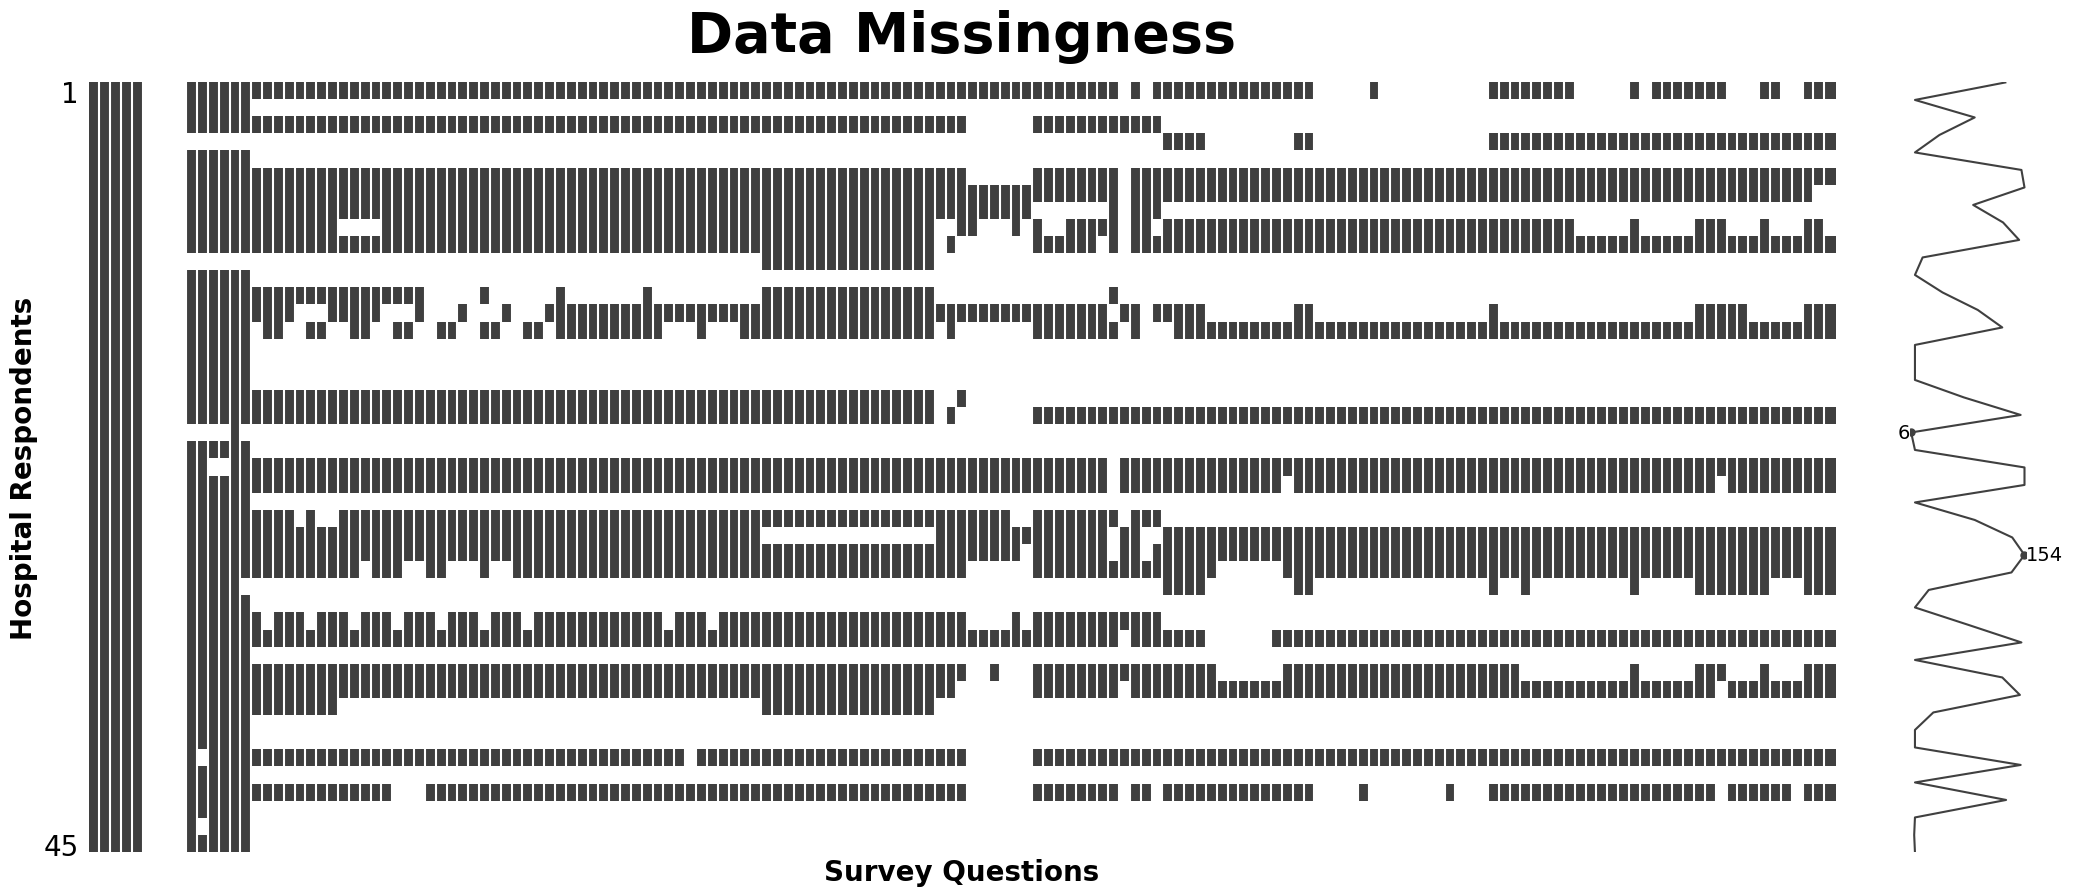

In [159]:
ut.display_missingness(df)

This shows the location of missing values in the responses.  
Some hospitals are missing many of the responses, others responded to nearly every quesions.  

Some of the questions received zero responses. These appear to be Survey Monkey generated columns and not from actual survery questions.

We will look at these columns next

In [160]:
# This function will generate list of columns that have zero values; ALL missing
columns_to_drop = ut.missingness_cols(df, 1.00)
print(f'Columns to drop: {columns_to_drop}')

Columns to drop: ['5', '6', '7', '8']


The above columns can be safely dropped.

In [161]:
# Remove columns
df = df.drop(columns_to_drop, axis = 1)

Missingness display post dropping empty columns.

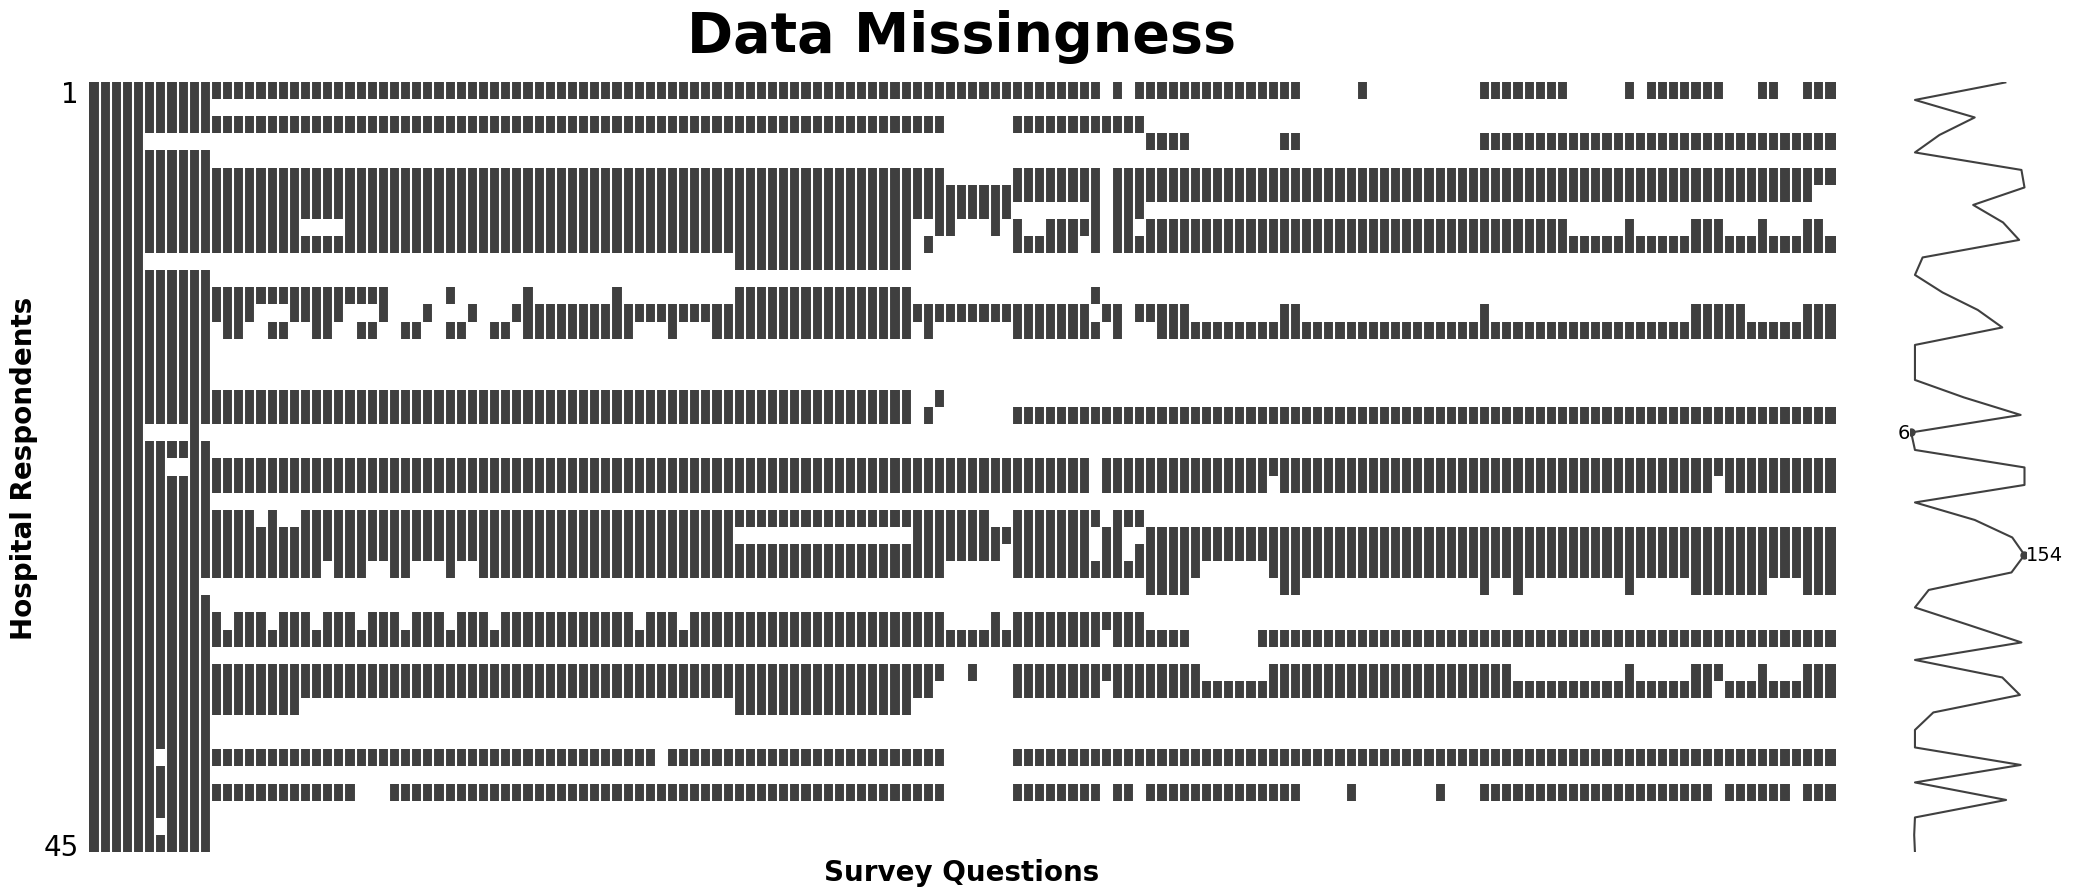

In [162]:
ut.display_missingness(df)

___
### Inspect Response Proportion by Hospital  
Hospital name and address are currently in the same column so first we will parse them out

In [163]:
# Separate hospital name and address into two columns
df[['hospital_name', 'hospital_address']] = df['13'].str.extract(r'^(.*) \((.*)\)?$', expand = True)

# Drop the original combined column and reset the name of address column
df.drop(columns = "13", inplace=True)
df.rename(columns = {"hospital_name": "13"}, inplace = True)

In [164]:
# Calculate the proportion of missing values for each row
# Temporarily drop the "hospital_address" column for accuracy
missing_proportion = df.drop(columns="hospital_address").isnull().mean(axis=1)

# Determine the maximum length of the hospital names for formatting
max_length = max(df["13"].astype(str).apply(len))

# Display each hospital with its missing proportion
print("Proportion of missing responses for each respondent:\n")
for hospital, proportion in zip(df["13"], missing_proportion):
    print(f'{hospital:<{max_length + 3}} ---> {(proportion * 100):.2f}%')

Proportion of missing responses for each respondent:

MaineGeneral Medical Center                    ---> 17.83%
MaineGeneral Medical Center                    ---> 92.99%
MaineGeneral Medical Center                    ---> 43.31%
nan                                            ---> 72.61%
St. Joseph Hospital                            ---> 92.99%
Northern Light Eastern Maine Medical Center    ---> 4.46%
Spring Harbor Hospital                         ---> 1.91%
Northern Light Eastern Maine Medical Center    ---> 44.59%
Central Maine Medical Center                   ---> 19.75%
Down East Community Hospital                   ---> 6.37%
nan                                            ---> 86.62%
Spring Harbor Hospital                         ---> 92.99%
LincolnHealth                                  ---> 70.06%
Penobscot Valley Hospital                      ---> 40.76%
Franklin Memorial Hospital                     ---> 20.38%
LincolnHealth                                  ---> 92.99%
North

This demonstrates two potential issues:
1. Missing respondent identifying information. Should we keep?
2. Duplicate Hospital names. This is not a function of the parsing, the addresses also match.

### Combine Duplicated Rows

In [185]:
def get_duplicated_rows(df:pd.DataFrame) -> None:
    """
    Generates an aggregation of duplicated rows
    """
    # Display the duplicates and the values
    duplicated_counts = df[df["13"].duplicated(keep=False)]["13"].value_counts()
    result = duplicated_counts.reset_index()
    result.columns = ["Value", "Count"]
    return result

result = get_duplicated_rows(df)
result

,Value,Count
0,St. Joseph Hospital,5
1,Houlton Regional Hospital,4
2,MaineGeneral Medical Center,3
3,Southern Maine Health Care-Biddeford Campus,3
4,Northern Light Eastern Maine Medical Center,2
5,Spring Harbor Hospital,2
6,Down East Community Hospital,2
7,LincolnHealth,2
8,Redington-Fairview General Hospital,2
9,Maine Medical Center,2


In [186]:
def get_list_of_unique_duplicated_rows(df:pd.DataFrame) -> None:
    """
    Generates a list of duplicate rows
    """
    # Get a list of duplicated columns
    dup_hospital_name_list = list(df["Value"])
    return dup_hospital_name_list

dup_hospital_name_list = get_list_of_unique_duplicated_rows(result)
dup_hospital_name_list

['St. Joseph Hospital',
 'Houlton Regional Hospital',
 'MaineGeneral Medical Center',
 'Southern Maine Health Care-Biddeford Campus',
 'Northern Light Eastern Maine Medical Center',
 'Spring Harbor Hospital',
 'Down East Community Hospital',
 'LincolnHealth',
 'Redington-Fairview General Hospital',
 'Maine Medical Center',
 'Northern Light A.R. Gould Hospital']

In [187]:
def display_duplicated_columns_for_inspection(df:pd.DataFrame) -> None:
    """ 
    Display the duplicate rows side-by-side for comparison
    """
    print("-" * 80)
    print(f"DUPLICATE RESPONSES FOR: \n\t {df.iloc[0, 156]}")
    print("-" * 80)
    print()
    for i in range(df.shape[1]):
        if df.shape[0] == 2:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]}")
        elif df.shape[0] == 3:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]} - {df.iloc[2, i]}")
        elif df.shape[0] == 4:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]} - {df.iloc[2, i]} - {df.iloc[2, i]}")
        elif df.shape[0] == 5:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]} - {df.iloc[2, i]} - {df.iloc[2, i]} - {df.iloc[2, i]}")
    return None

def merge_duplicate_rows(filtered_df:pd.DataFrame) -> None:
    """  
    Merge duplicate rows based on hueristic.
    """
    filtered_df['3'] = pd.to_datetime(filtered_df['3'], errors='coerce')
    merged_row = {}
    for col in filtered_df.columns:
        col_values = filtered_df[col]
        # Case 1: All row values NaN
        if col_values.isna().all():
            merged_row[col] = np.nan # Set the new row value to NaN
        else:

            # Case 2: One unique value that is NaN
            unique_values = col_values.dropna().unique()
            if len(unique_values) == 1:
                merged_row[col] = unique_values[0] # Set the new to equal the only unqiue that is not NaN
            
            else:

                # Case 3: There is more than one unique non-NaN value
                # In this case, we take the value that was enter during the most recent log-in. This logic assumes the new entry is correction; this not nessacarily true.
                end_data_column = filtered_df["3"] # Extract the end data column as a pd.Series
                last_log_out = end_data_column.idxmax() # Extract the index of the most recent logout.
                value_to_keep = col_values.loc[last_log_out] # Extract the value from the column of interest that corresponds to the last logout
                merged_row[col] = value_to_keep # Set the new value

    # Return the merged row
    return merged_row

In [188]:
filtered_df = df[df["13"] == dup_hospital_name_list[0]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 St. Joseph Hospital
--------------------------------------------------------------------------------

Column 0: 118682962876.0 - 118672806611.0 - 118670822807.0 - 118670822807.0 - 118670822807.0
Column 1: 457316537.0 - 457316537.0 - 457316537.0 - 457316537.0 - 457316537.0
Column 2: 09/02/2024 01:50:09 PM - 08/19/2024 01:43:22 AM - 08/15/2024 09:03:58 AM - 08/15/2024 09:03:58 AM - 08/15/2024 09:03:58 AM
Column 3: 09/02/2024 01:55:28 PM - 08/19/2024 01:45:29 AM - 08/15/2024 09:44:41 AM - 08/15/2024 09:44:41 AM - 08/15/2024 09:44:41 AM
Column 4: 192.219.255.13 - 66.181.116.42 - 192.219.255.13 - 192.219.255.13 - 192.219.255.13
Column 5: Jessica Taylor - James Hildebrand - Jessica Taylor - Jessica Taylor - Jessica Taylor
Column 6: Senior Director Population Health and Care Transitions  - Emergency Department Medical Director - Senior Director, Population Health and Care Transitions -

In [189]:
merged_row = merge_duplicate_rows(filtered_df)
merged_row

/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_60984/1093640370.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['3'] = pd.to_datetime(filtered_df['3'], errors='coerce')
/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_60984/1093640370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['3'] = pd.to_datetime(filtered_df['3'], errors='coerce')


{'0': 118682962876.0,
 '1': 457316537.0,
 '2': '09/02/2024 01:50:09 PM',
 '3': Timestamp('2024-09-02 13:55:28'),
 '4': '192.219.255.13',
 '9': 'Jessica Taylor',
 '10': 'Senior Director Population Health and Care Transitions ',
 '11': 'jessica.taylor@sjhhealth.com',
 '12': '207-907-3333',
 '14': 'No',
 '15': '10',
 '16': '3',
 '17': '4',
 '18': '2',
 '19': nan,
 '20': '3',
 '21': nan,
 '22': nan,
 '23': '0',
 '24': '0',
 '25': '0',
 '26': '0',
 '27': '10',
 '28': '3',
 '29': '4',
 '30': '2',
 '31': '10',
 '32': '3',
 '33': '4',
 '34': '2',
 '35': '0',
 '36': '3',
 '37': '0',
 '38': '0',
 '39': '0',
 '40': '0',
 '41': '0',
 '42': '0',
 '43': '10',
 '44': '12',
 '45': '3',
 '46': '2',
 '47': '0',
 '48': '0',
 '49': '2',
 '50': '2',
 '51': '3',
 '52': '0',
 '53': '0',
 '54': '3',
 '55': '1',
 '56': '1',
 '57': '0',
 '58': '0',
 '59': '0',
 '60': '0',
 '61': '0',
 '62': '10',
 '63': '12',
 '64': '2',
 '65': '3',
 '66': '16',
 '67': '15',
 '68': '14',
 '69': '1',
 '70': '9',
 '71': '13',
 '7

In [169]:
filtered_df = df[df["13"] == dup_hospital_name_list[1]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 Houlton Regional Hospital
--------------------------------------------------------------------------------

Column 0: 118678664089.0 - 118669589097.0 - 118659805477.0 - 118659805477.0
Column 1: 457316537.0 - 457316537.0 - 457316537.0 - 457316537.0
Column 2: 08/27/2024 02:55:22 AM - 08/14/2024 02:52:17 AM - 07/31/2024 06:44:17 AM - 07/31/2024 06:44:17 AM
Column 3: 08/27/2024 03:12:30 AM - 08/14/2024 03:06:42 AM - 07/31/2024 07:12:36 AM - 07/31/2024 07:12:36 AM
Column 4: 74.221.74.1 - 98.97.21.91 - 74.221.74.1 - 74.221.74.1
Column 5: Shauna Cameron - Thomas C Dancoes - Traci Peabody - Traci Peabody
Column 6: CEO - Emergency Medicine Medical Director - nan - nan
Column 7: scameron@hrhospital.org - tdancoes@bluewaterhealth.com - tpeabody@hrhospital.org - tpeabody@hrhospital.org
Column 8: 2075212153 - 2077453076 - 2075212259 - 2075212259
Column 9: Yes - nan - Yes - Yes
Column 10: 1 -

In [170]:
filtered_df = df[df["13"] == dup_hospital_name_list[2]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 MaineGeneral Medical Center
--------------------------------------------------------------------------------

Column 0: 118685232909.0 - 118685071763.0 - 118684311243.0
Column 1: 457316537.0 - 457316537.0 - 457316537.0
Column 2: 09/05/2024 07:26:18 AM - 09/05/2024 04:29:01 AM - 09/04/2024 06:46:40 AM
Column 3: 09/05/2024 08:12:47 AM - 09/05/2024 04:29:38 AM - 09/04/2024 08:21:38 AM
Column 4: 63.165.188.241 - 63.165.188.241 - 63.165.188.241
Column 5: Sue Parent Dorson - Janelynn Deprey - Sue Parent Dorson
Column 6: Manager Care management - Nursing Director  - Manager Care management
Column 7: sue.parentdorson@mainegeneral.org - janelynn.deprey@mainegeneral.org - sue.parentdorson@mainegeneral.org
Column 8: 2076261293 - 2076244227 - 2076261293
Column 9: No - No - No
Column 10: 15 - nan - 4
Column 11: 0 - nan - 8
Column 12: 7 - nan - 6
Column 13: 0 - nan - 0
Column 14: 1 - nan - 0


In [171]:
filtered_df = df[df["13"] == dup_hospital_name_list[4]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 Northern Light Eastern Maine Medical Center
--------------------------------------------------------------------------------

Column 0: 118680508060.0 - 118681321253.0
Column 1: 457316537.0 - 457316537.0
Column 2: 08/27/2024 06:10:38 AM - 08/30/2024 05:58:10 AM
Column 3: 08/30/2024 10:09:27 AM - 08/30/2024 06:17:07 AM
Column 4: 198.160.5.14 - 198.160.5.14
Column 5: Kimberly Moreau - Kimberly Moreau
Column 6: Director, Inpatient Care Management - Director Care Management
Column 7: kjmoreau@northernlight.org - kjmoreau@northernlight.org
Column 8: 207.973.7840 - 207.973.7840
Column 9: No - No
Column 10: 17 - 0
Column 11: 21 - 22
Column 12: 2 - 1
Column 13: 27 - 0
Column 14: 1 - 0
Column 15: 2 - 2
Column 16: 0 - 0
Column 17: 0 - 0
Column 18: 0 - 0
Column 19: 0 - 0
Column 20: 0 - 0
Column 21: 0 - 0
Column 22: 7 - 0
Column 23: 0 - 0
Column 24: 1 - 1
Column 25: 19 - 0
Column 26: 1 - 0


In [172]:
filtered_df = df[df["13"] == dup_hospital_name_list[5]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 Spring Harbor Hospital
--------------------------------------------------------------------------------

Column 0: 118681371697.0 - 118678984197.0
Column 1: 457316537.0 - 457316537.0
Column 2: 08/30/2024 07:01:32 AM - 08/27/2024 09:04:53 AM
Column 3: 08/30/2024 07:55:49 AM - 08/27/2024 09:05:35 AM
Column 4: 63.247.53.27 - 63.247.57.15
Column 5: Karl Buckley - Kelly Barton
Column 6: Director - President
Column 7: Karl.Buckley@mainehealth.org - kelly.barton@mainehealth.org
Column 8: 207-661-6081 - 207-661-6206
Column 9: No - No
Column 10: 0 - nan
Column 11: 0 - nan
Column 12: 12 - nan
Column 13: 0 - nan
Column 14: 0 - nan
Column 15: 0 - nan
Column 16: 2 - nan
Column 17: 0 - nan
Column 18: 0 - nan
Column 19: 0 - nan
Column 20: 0 - nan
Column 21: 0 - nan
Column 22: 0 - nan
Column 23: 0 - nan
Column 24: 10 - nan
Column 25: 0 - nan
Column 26: 0 - nan
Column 27: 0 - nan
Column 28: 10 -

In [173]:
filtered_df = df[df["13"] == dup_hospital_name_list[6]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 Down East Community Hospital
--------------------------------------------------------------------------------

Column 0: 118679601435.0 - 118678233250.0
Column 1: 457316537.0 - 457316537.0
Column 2: 08/28/2024 04:48:07 AM - 08/26/2024 11:07:18 AM
Column 3: 08/28/2024 05:21:03 AM - 08/26/2024 11:08:00 AM
Column 4: 192.159.150.34 - 12.138.229.77
Column 5: Laurie Hayward - Christina Bridges
Column 6: Director of Case Management - Executive Assistant 
Column 7: lhayward@dech.org - cbridges@dech.org
Column 8: 2072550476 - 2072550225
Column 9: Yes - Yes
Column 10: 2 - nan
Column 11: 2 - nan
Column 12: 1 - nan
Column 13: 0 - nan
Column 14: 0 - nan
Column 15: 0 - nan
Column 16: 0 - nan
Column 17: 0 - nan
Column 18: 0 - nan
Column 19: 0 - nan
Column 20: 0 - nan
Column 21: 0 - nan
Column 22: 0 - nan
Column 23: 2 - nan
Column 24: 1 - nan
Column 25: 0 - nan
Column 26: 0 - nan
Column 27: 2 -

In [174]:
filtered_df = df[df["13"] == dup_hospital_name_list[7]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 LincolnHealth
--------------------------------------------------------------------------------

Column 0: 118678887898.0 - 118678735424.0
Column 1: 457316537.0 - 457316537.0
Column 2: 08/27/2024 07:18:51 AM - 08/27/2024 04:23:24 AM
Column 3: 08/27/2024 07:43:53 AM - 08/27/2024 04:24:49 AM
Column 4: 71.181.40.218 - 71.181.40.218
Column 5: Jill Simmons - Cindy Wade
Column 6: Manager of Case Management - President
Column 7: jill.m.simmons@mainehealth.org - cindy.wadde@mainehealth.org 
Column 8: 2075634457 - 207 563-4597
Column 9: Yes - Yes
Column 10: 0 - nan
Column 11: 2 - nan
Column 12: 1 - nan
Column 13: 0 - nan
Column 14: 0 - nan
Column 15: 0 - nan
Column 16: 0 - nan
Column 17: 0 - nan
Column 18: 0 - nan
Column 19: 0 - nan
Column 20: 0 - nan
Column 21: 0 - nan
Column 22: 0 - nan
Column 23: 1 - nan
Column 24: 1 - nan
Column 25: 0 - nan
Column 26: nan - nan
Column 27: nan - nan
Co

In [175]:
filtered_df = df[df["13"] == dup_hospital_name_list[8]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 Redington-Fairview General Hospital
--------------------------------------------------------------------------------

Column 0: 118665695055.0 - 118659827832.0
Column 1: 457316537.0 - 457316537.0
Column 2: 08/08/2024 08:16:02 AM - 07/31/2024 07:12:04 AM
Column 3: 08/08/2024 08:56:23 AM - 07/31/2024 07:12:51 AM
Column 4: 192.159.148.67 - 192.159.148.67
Column 5: Tiffany Comis - Kelly Pressey
Column 6: CNO - Director of Hospital Case Management
Column 7: tcomis@rfgh.net - kpressey@rfgh.net
Column 8: 207-858-2480 - 207-858-2276
Column 9: Yes - Yes
Column 10: 3 - nan
Column 11: 1 - nan
Column 12: 0 - nan
Column 13: 2 - nan
Column 14: 0 - nan
Column 15: 0 - nan
Column 16: 0 - nan
Column 17: 0 - nan
Column 18: 0 - nan
Column 19: 0 - nan
Column 20: 0 - nan
Column 21: 0 - nan
Column 22: 0 - nan
Column 23: 1 - nan
Column 24: 0 - nan
Column 25: 2 - nan
Column 26: 0 - nan
Column 27: 0 - na

In [176]:
filtered_df = df[df["13"] == dup_hospital_name_list[9]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 Maine Medical Center
--------------------------------------------------------------------------------

Column 0: 118660469738.0 - 118660377090.0
Column 1: 457316537.0 - 457316537.0
Column 2: 08/01/2024 03:34:19 AM - 08/01/2024 12:59:50 AM
Column 3: 08/01/2024 03:42:13 AM - 08/01/2024 01:00:28 AM
Column 4: 63.247.53.19 - 63.247.53.31
Column 5: Mary McNulty - Tom Lyon
Column 6: Senior Director, Care Management - VP, Operations
Column 7: mary.mcnulty - thomas.lyon@mainehealth.org
Column 8: 207-662-5649 - 507-581-1498
Column 9: No - No
Column 10: 10 - nan
Column 11: 23 - nan
Column 12: 0 - nan
Column 13: 0 - nan
Column 14: 0 - nan
Column 15: 1 - nan
Column 16: 0 - nan
Column 17: 0 - nan
Column 18: nan - nan
Column 19: nan - nan
Column 20: nan - nan
Column 21: nan - nan
Column 22: nan - nan
Column 23: nan - nan
Column 24: nan - nan
Column 25: nan - nan
Column 26: nan - nan
Column 27:

In [177]:
filtered_df = df[df["13"] == dup_hospital_name_list[10]]
display_duplicated_columns_for_inspection(filtered_df)

--------------------------------------------------------------------------------
DUPLICATE RESPONSES FOR: 
	 Northern Light A.R. Gould Hospital
--------------------------------------------------------------------------------

Column 0: 118659824835.0 - 118659794557.0
Column 1: 457316537.0 - 457316537.0
Column 2: 07/31/2024 07:06:15 AM - 07/31/2024 06:29:31 AM
Column 3: 07/31/2024 07:08:53 AM - 07/31/2024 06:48:29 AM
Column 4: 198.160.5.13 - 198.160.5.11
Column 5: Daniel O'Bryan - Heather Pelletier
Column 6: RN Manager, Care Management - ED RN Manager
Column 7: dobryan@northernlight.org - hpelletier@northernlight.org
Column 8: 2077682014 - 207-768-4860
Column 9: No - No
Column 10: nan - 5
Column 11: nan - 3
Column 12: nan - 0
Column 13: nan - 0
Column 14: nan - 0
Column 15: nan - 0
Column 16: nan - 0
Column 17: nan - 0
Column 18: nan - 0
Column 19: nan - 0
Column 20: nan - 0
Column 21: nan - 0
Column 22: nan - 2
Column 23: nan - nan
Column 24: nan - nan
Column 25: nan - nan
Column 26: n